In [11]:
import sys
import pandas as pd
import numpy as np
import scanpy as sc

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'axes.labelsize' : 'large'}) 
from matplotlib.backends.backend_pdf import PdfPages

import sys
import os

import gc
import warnings
import time
import pickle

from adjustText import adjust_text

<h3>Load data</h3>

In [12]:
data_folder="/project/GCRB/Hon_lab/s223695/Data_project/Perturb_seq_edist_pipeline/pipeline_output/"
edist_matrix_file_name = "target_by_target_matrix.csv"
edist_embedding_file_name = "edist_embedding_info.csv"

In [21]:
target_estats = pd.read_csv(os.path.join(data_folder,edist_matrix_file_name),index_col=0)
total_edist_emb = pd.read_csv(os.path.join(data_folder,edist_embedding_file_name),index_col=0)

In [24]:
total_edist_emb = total_edist_emb.set_index("index")

In [16]:
target_estats

,ADNP2:P1P2,AFF4:P1P2,AHCY:P1P2,AHDC1:P1P2,APITD1:P1P2,AR:P1P2,ARID2:P1P2,ARID3A:P1P2,ARID4B:P1P2,ARNT:P1P2,...,ZNF532:P1,ZNF532:P2,ZNF608:P1,ZNF649:P1P2,ZNF664:P1P2,ZNF787:P1P2,ZNF844:P1P2,ZNF8:P1P2,ZNF91:P1P2,ZSCAN10:P1P2
ADNP2:P1P2,0.000000,22.092773,20.429932,53.992920,43.270508,63.649902,42.548950,37.785156,69.022339,89.541992,...,53.542847,69.382324,88.840576,52.595459,25.636841,27.094360,65.125244,52.889282,56.103882,58.981934
AFF4:P1P2,22.092773,0.000000,6.562256,42.368164,15.295654,31.109375,17.084106,28.737061,36.056763,52.382324,...,22.442261,35.416504,60.130127,28.753174,4.153931,9.250854,38.494385,27.655640,25.915649,73.088867
AHCY:P1P2,20.429932,6.562256,0.000000,41.454590,20.374023,40.027832,31.714478,31.829102,48.144165,50.224121,...,31.765503,40.516602,70.902100,33.595215,12.301636,16.875366,39.220947,30.142700,29.194458,86.191406
AHDC1:P1P2,53.992920,42.368164,41.454590,0.000000,24.610107,22.764160,56.921997,21.028320,33.633179,61.897461,...,28.035767,27.859619,29.375000,20.581787,36.811646,77.418335,16.294189,19.395874,20.636841,175.707275
APITD1:P1P2,43.270508,15.295654,20.374023,24.610107,0.000000,5.964600,29.944458,15.117676,14.184937,41.640625,...,6.511841,9.885986,24.377930,5.143799,10.197388,40.650024,9.672119,4.610229,4.034058,132.947998


In [10]:
sns.clustermap(target_estats,figsize=(80,80),vmax=100)
#plt.savefig("gene_heatmap_v3.pdf")

/project/GCRB/Hon_lab/s223695/anaconda3/envs/scanpy_gpu/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/project/GCRB/Hon_lab/s223695/anaconda3/envs/scanpy_gpu/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/project/GCRB/Hon_lab/s223695/anaconda3/envs/scanpy_gpu/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/project/GCRB/Hon_lab/s223695/anaconda3/envs/scanpy_gpu/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage 

<h3>Use the best clustering parameter +visualization </h3>

In [26]:
for cluster_index in np.unique(total_edist_emb["cluster"]):
    print(cluster_index,total_edist_emb[total_edist_emb["cluster"]==cluster_index].index.tolist())

0 ['AFF4:P1P2', 'AHCY:P1P2', 'ARID2:P1P2', 'CNBP:P1P2', 'DNTTIP1:P1P2', 'ETS1:P1P2', 'EZH1:P1P2', 'KDM5B:P1P2', 'KLF12:P1P2', 'MBD6:P1P2', 'PHF21A:P1P2', 'PSIP1:P1P2', 'RARA:P1', 'SIRT6:P1P2', 'SMAD4:P1P2', 'SOX12:P1P2', 'SUPT4H1:P1P2', 'TBX6:P1P2', 'TCEB3:P1P2', 'TOPORS:P1P2', 'WT1:P1P2', 'YWHAE:P1P2', 'ZC3H15:P1P2', 'ZFPM2:P1P2', 'ZNF133:P1P2', 'ZNF292:P1P2', 'ZNF503:P1P2', 'ZNF664:P1P2']
1 ['ARID3A:P1P2', 'BAZ2A:P1', 'BBX:P1P2', 'CHD7:P1P2', 'CTBP1:P1P2', 'ELF4:P1P2', 'GLI3:P1P2', 'MTF1:P1P2', 'NCOA6:P1P2', 'RB1:P1P2', 'RBL2:P1', 'RREB1:P1P2', 'SALL2:P1P2', 'SMAD6:P1P2', 'THAP4:P1P2', 'ZNF496:P1P2']
2 ['EOMES:P1P2']
3 ['FOXH1:P1P2']
4 ['ARNT:P1P2', 'HIF1A:P1P2']
5 ['ISL1:P1']
6 ['KMT2A:P1P2']
7 ['AR:P1P2', 'ARID4B:P1P2', 'BRPF1:P1P2', 'CDK2:P1P2', 'CSNK2A1:P1P2', 'DOT1L:P1P2', 'HAND2:P1', 'HOXB4:P1P2', 'KAT7:P1P2', 'LHX2:P1P2', 'MEIS1:P1P2', 'MLLT1:P1P2', 'MYRF:P2', 'TBX18:P1', 'TULP4:P1P2', 'ZBTB10:P1P2', 'ZNF436:P1', 'ZNF608:P1']
8 ['NKX2-5:P1P2']
9 ['GATA4:P1P2', 'MIXL1:P1P2', 'P

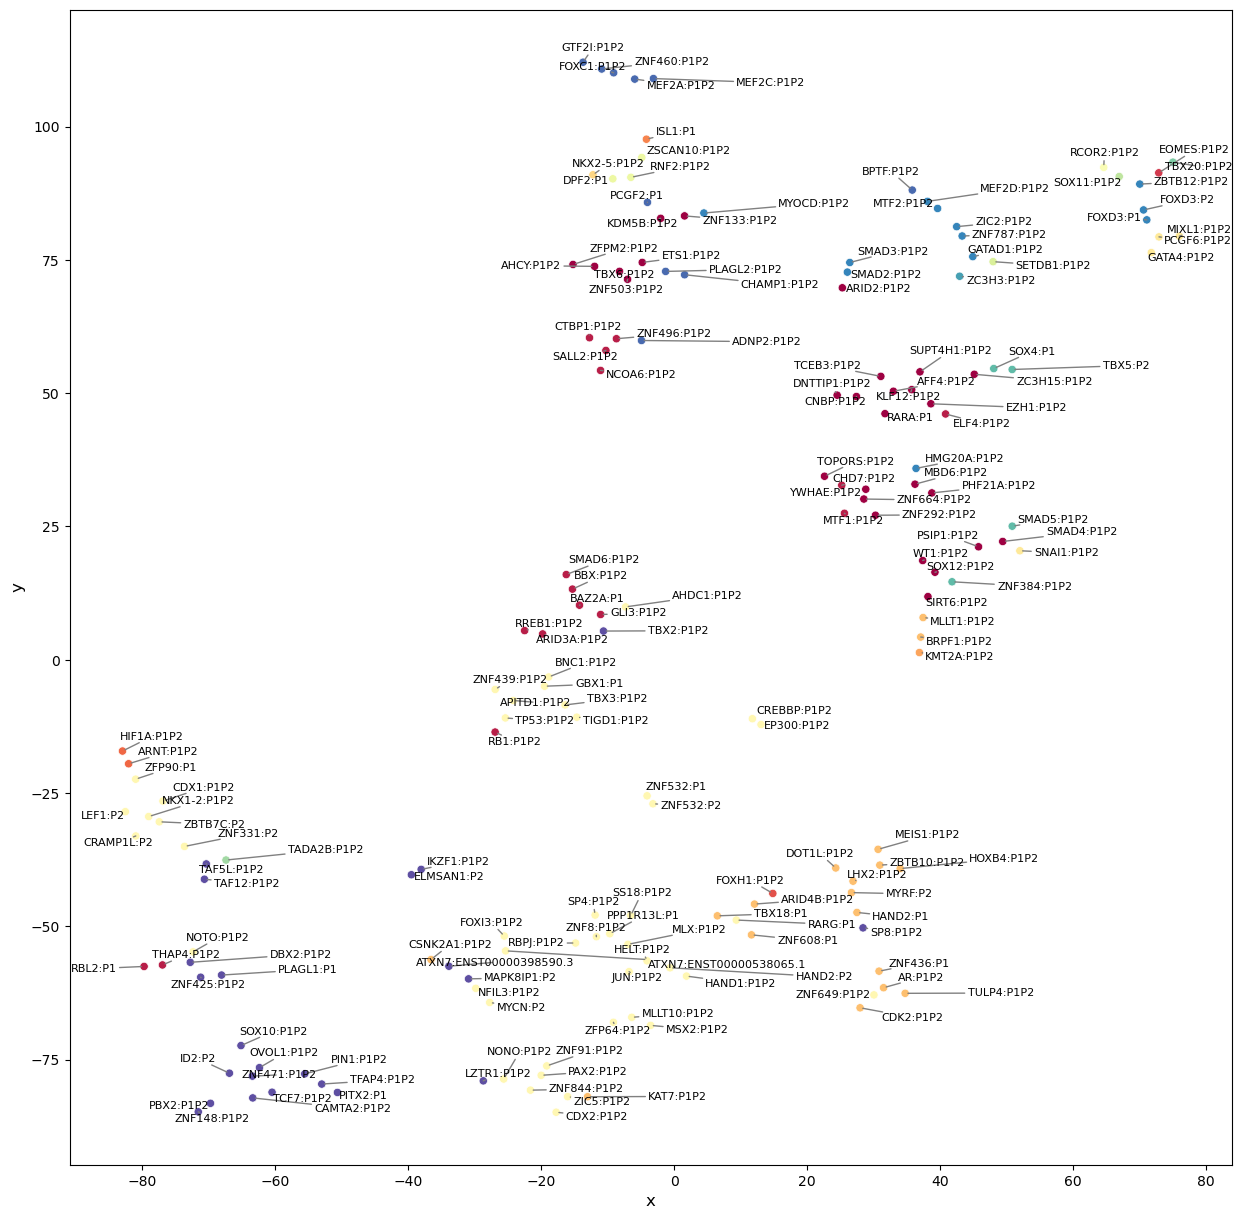

In [30]:
fig,ax= plt.subplots(figsize=(15,15)) 

sns.scatterplot(data=total_edist_emb,x="x",y="y",ax=ax,hue="cluster",
                palette=sns.color_palette("Spectral", as_cmap=True),legend=None)
texts = []
for index,row in total_edist_emb.iterrows():
    plt_text = ax.annotate(index, (row["x"], row["y"]), fontsize=8, color='black')   
    texts.append(plt_text)
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=1),force_text=(0.5, 0.5))